# Bridge Data Import

In this cell, we import bridge data from a CSV file located one step above the notebook's directory. The data is loaded into a DataFrame for further analysis.


In [1]:
import os
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Navigate one step above the current directory
parent_dir = os.path.dirname(current_dir)

# Construct the full path to your CSV file
csv_file_path = os.path.join(parent_dir, 'data_full.csv')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains your dataset from 'C:\Users\Doktor\Documents\GitHub\Bridges\data_full.csv'

## Rename Columns

In this step, we rename the columns of the DataFrame to make them more descriptive and readable for analysis.


In [2]:
# Rename the columns
df.rename(columns={
    'ID mosta': "Bridge_ID",
    'Okres': "District",
    'Longitude': "Longitude",
    'Latitude': "Latitude",
    'Material': "Material",
    'Názov mosta': "Bridge_Name",
    'Dĺžka premostenia': "Bridge_Length",
    'Rok postavenia': "Year_of_Construction",
    'Volná šírka mosta': "Bridge_Width",
    'Normána zaťažiteľnost': "Load_Capacity",
    'Trieda PK': "Road_Class",
    'Druh konštrukcie': "Type_of_Structure",
    'Kraj': "Region",
    'n_2012': "num_2012",
    'n_2013': "num_2013",
    'n_2014': "num_2014",
    'n_2015': "num_2015",
    'n_2016': "num_2016",
    'n_2017': "num_2017",
    'n_2018': "num_2018",
    'n_2019': "num_2019",
    'n_2020': "num_2020",
    'n_2021': "num_2021",
    'n_2022': "num_2022",
    'n_2023': "num_2023",
    'Predmet premostenia': "Bridge_Purpose"

}, inplace=True)

In [3]:
columns_to_remove = [str(i) for i in range(2012, 2024)]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)

### Filtering Data in Pandas DataFrame

This code snippet filters a Pandas DataFrame to select rows based on two conditions:

1. Rows where the "num_2023" column is not equal to zero.
2. Rows where the "Bridge_Length" column is not a NaN value.

It uses the `~df["Bridge_Length"].isna()` condition to check for non-NaN values in the "Bridge_Length" column and combines the conditions using the `&` operator to ensure both conditions are met.


In [4]:
import numpy as np

classified_bridges = df[(df["num_2023"] != 0) & (
    ~df["Bridge_Length"].isna()) & (df["Bridge_Length"] != "Nezistený")]

nan_category_bridges = classified_bridges[pd.isna(
    classified_bridges["Bridge_Length"])]
len(nan_category_bridges[["Bridge_ID", "Bridge_Length"]])

0

**Histogram of Bridge Length (Logarithmic Scale)**

In this plot, we visualize the distribution of bridge lengths using a histogram with a logarithmic x-axis scale. The dataset used is `classified_bridges["Bridge_Length"]`.

**Plot Details:**

- The histogram is created with logarithmic bins, enhancing the visibility of variations in bridge lengths.
- The x-axis represents "Bridge Length" in a logarithmic scale, making it suitable for visualizing a wide range of values.
- The y-axis represents the frequency of bridges within each bin.
- Each bin is annotated with the approximate mean length of bridges in that bin, displayed in meters.
- Y-axis ticks are customized to provide a clearer view of frequency.
- A semi-transparent grid is added to the y-axis for reference.

This histogram helps us understand the distribution of bridge lengths in the dataset, highlighting any trends or clusters in bridge lengths.


[   1.95          3.85320702    7.61395093   15.04519442   29.7293583
   58.74531896  116.08096162  229.37639777  453.24858722  895.62083899
 1769.75      ]


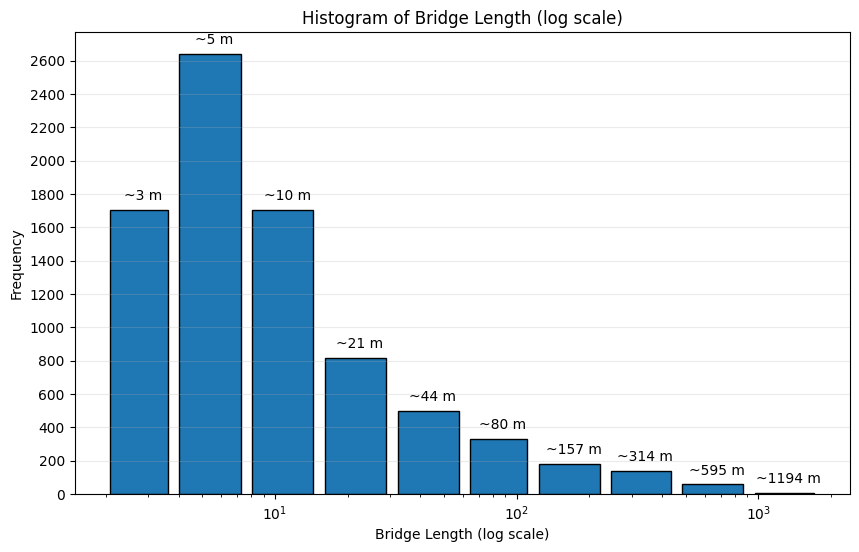

In [5]:
import numpy as np
import matplotlib.pyplot as plt

number_of_bins = 11
labels_blc = [str(i+1) for i in range(number_of_bins - 1)]  # Reduce by one

# Convert the "Bridge_Length" column to numeric (float) using .loc
classified_bridges.loc[:, "Bridge_Length"] = pd.to_numeric(
    classified_bridges["Bridge_Length"], errors="coerce")

# Define the parameters for the histogram plot
data = classified_bridges["Bridge_Length"]

# Create logarithmic bins for the x-axis
log_bins = np.logspace(np.log10(data.min()), np.log10(
    data.max()), num=number_of_bins)
print(log_bins)

log_bins = ([   1.94,    3.75,    7.5,   15.0,  30.0,   60.0,  115.0,  230.0,
        450.0,  900.0, 1770.00      ])

# Create a histogram with logarithmic x-axis and adjust bin spacing (rwidth)
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data, bins=log_bins, edgecolor='k', rwidth=0.85)
plt.xscale('log')  # Set x-axis to log scale
plt.xlabel("Bridge Length (log scale)")
plt.ylabel("Frequency")
plt.title("Histogram of Bridge Length (log scale)")

# Calculate and annotate the mean value for each bin
bin_means = [data[(data >= bin_start) & (data < bin_end)].mean()
             for bin_start, bin_end in zip(bins[:-1], bins[1:])]

for i, bin_mean in enumerate(bin_means):
    plt.annotate(f"~{bin_mean:.0f} m",
                 xy=(bins[i] + (bins[i + 1] - bins[i]) / 2, hist[i]),
                 xytext=(0, 5), textcoords='offset points',
                 ha='center', va='bottom')

# Customize the y-axis ticks and enable grid with transparency
# Adjust the range and step as needed
plt.yticks(np.arange(0, max(hist) + 1, 200))
plt.grid(True, axis='y', alpha=0.25)  # Set alpha for transparency

plt.show()

In [6]:
# # Create a new column "Bridge_Length_Category" based on the logarithmic bins
# classified_bridges["Bridge_Length_Category"] = pd.cut(classified_bridges["Bridge_Length"],
#                                                       bins=log_bins,
#                                                       labels=labels_blc)

# Define the boundaries of the bins
bin_boundaries = list(log_bins)

# Create a list of category descriptions based on the bin boundaries
category_descriptions = [f"{bin_start:.2f} - {bin_end:.2f} m"
                         for bin_start, bin_end in zip(bin_boundaries[:-1], bin_boundaries[1:])]

# Create a dictionary to map category labels to descriptions
category_description_mapping = {label: description for label, description in zip(
    labels_blc, category_descriptions)}

# Create a new column "Bridge_Length_Category" based on the logarithmic bins
classified_bridges["Bridge_Length_Category"] = pd.cut(classified_bridges["Bridge_Length"],
                                                      bins=log_bins,
                                                      labels=labels_blc)  # Use labels as category numbers

/tmp/ipykernel_8101/3875866703.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classified_bridges["Bridge_Length_Category"] = pd.cut(classified_bridges["Bridge_Length"],


In [7]:
import numpy as np

# Get the unique bridge length categories
categories = classified_bridges["Bridge_Length_Category"].unique()

# Initialize the conditions dictionary
conditions = {}

for category in categories:
    current = classified_bridges[classified_bridges["Bridge_Length_Category"] == category]

    # Calculate the value counts for num_2023
    value_counts = current["num_2023"].value_counts()

    # Update the conditions dictionary with the value counts
    conditions[category] = value_counts.to_dict()

# Print the updated conditions dictionary
print(conditions)

{'2': {4: 1130, 5: 603, 3: 452, 6: 273, 2: 126, 1: 56, 7: 9}, '3': {4: 690, 5: 413, 3: 260, 6: 158, 2: 102, 1: 69, 7: 14}, '5': {4: 134, 5: 106, 3: 87, 6: 62, 2: 57, 1: 39, 7: 7}, '1': {4: 723, 5: 363, 3: 338, 6: 167, 2: 76, 1: 45, 7: 7}, '6': {4: 83, 3: 65, 5: 57, 2: 57, 1: 36, 6: 28, 7: 5}, '4': {4: 297, 5: 189, 3: 101, 6: 95, 2: 60, 1: 47, 7: 10}, '8': {2: 42, 1: 33, 3: 29, 4: 18, 6: 11, 5: 5}, '7': {2: 43, 4: 43, 1: 37, 3: 37, 5: 14, 6: 6, 7: 2}, '10': {3: 4, 1: 2, 2: 1}, '9': {3: 16, 2: 16, 1: 15, 4: 10, 5: 1}}


In [8]:
category_description_mapping

{'1': '1.94 - 3.75 m',
 '2': '3.75 - 7.50 m',
 '3': '7.50 - 15.00 m',
 '4': '15.00 - 30.00 m',
 '5': '30.00 - 60.00 m',
 '6': '60.00 - 115.00 m',
 '7': '115.00 - 230.00 m',
 '8': '230.00 - 450.00 m',
 '9': '450.00 - 900.00 m',
 '10': '900.00 - 1770.00 m'}

In [9]:
!pip install --upgrade nbformat

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px

# Get the unique bridge length categories and sort them
categories = sorted(
    classified_bridges["Bridge_Length_Category"].unique(), key=lambda x: int(x))

# Create a list to store data for each category
data_list = []

# Define condition labels
condition_labels = {
    1: "Flawless",
    2: "Very Good",
    3: "Good",
    4: "Satisfactory",
    5: "Poor",
    6: "Very Poor",
    7: "Critical"
}

for category in categories:
    conditions = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
    current = classified_bridges[classified_bridges["Bridge_Length_Category"] == category]
    value_counts = current["num_2023"].value_counts()

    # Calculate the total number of bridges in the current category
    total_bridges = len(current)

    # Update the conditions dictionary with the relative frequencies
    for index, count in value_counts.items():
        # Normalize by dividing by the total
        conditions[index] = count / total_bridges

    # Create a DataFrame for the current category
    df = pd.DataFrame({'Conditions': list(conditions.keys()),
                       'Relative Frequency': list(conditions.values())})

    # Add a column for the category description
    df['Category Description'] = category_description_mapping[category]

    # Add a column for condition labels
    df['Condition Label'] = df['Conditions'].map(condition_labels)

    # Append the DataFrame to the data list
    data_list.append(df)

# Concatenate all DataFrames in the data list
combined_data = pd.concat(data_list)

# Create a bar chart with Plotly Express and set barmode to 'group'
fig = px.bar(combined_data, x='Condition Label', y='Relative Frequency',
             color='Category Description',
             title='Relative Frequencies of Conditions in Bridge Categories',
             labels={'Condition Label': 'Condition Label',
                     'Relative Frequency': 'Relative Frequency',
                     'Category Description': 'Category Description'},
             barmode='group')  # Set barmode to 'group'

# Show the plot
fig.show()

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

# Get the unique bridge length categories and sort them
categories = sorted(
    classified_bridges["Bridge_Length_Category"].unique(), key=lambda x: int(x))

# Create a list to store data for each category
data_list = []

# Define condition labels
condition_labels = {
    1: "Flawless",
    2: "Very Good",
    3: "Good",
    4: "Satisfactory",
    5: "Poor",
    6: "Very Poor",
    7: "Critical"
}

for category in categories:
    conditions = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
    current = classified_bridges[classified_bridges["Bridge_Length_Category"] == category]
    value_counts = current["num_2023"].value_counts()

    # Create a DataFrame for the current category
    df = pd.DataFrame({'Conditions': list(conditions.keys()),
                       'Absolute Count': [value_counts.get(i, 0) for i in range(1, 8)]})

    # Add a column for the category description
    df['Category Description'] = category_description_mapping[category]

    # Add a column for condition labels
    df['Condition Label'] = df['Conditions'].map(condition_labels)

    # Append the DataFrame to the data list
    data_list.append(df)

# Concatenate all DataFrames in the data list
combined_data = pd.concat(data_list)

# Create a bar chart with Plotly Express and set barmode to 'group'
fig = px.bar(combined_data, x='Condition Label', y='Absolute Count',
             color='Category Description',
             title='Absolute Counts of Conditions in Bridge Categories',
             labels={'Condition Label': 'Condition Label',
                     'Absolute Count': 'Absolute Count',
                     'Category Description': 'Category Description'},
             barmode='group')  # Set barmode to 'group'

# Show the plot
fig.show()

In [12]:

filtered_bridges = classified_bridges[
    (((classified_bridges["Bridge_Length_Category"] == '6') |
      (classified_bridges["Bridge_Length_Category"] == '7') |
      (classified_bridges["Bridge_Length_Category"] == '8')) &
     ((classified_bridges["num_2023"] == 3) |
      (classified_bridges["num_2023"] == 4) |
      (classified_bridges["num_2023"] == 5) |
      (classified_bridges["num_2023"] == 6) |
      (classified_bridges["num_2023"] == 7))) &
    (((classified_bridges["Material"] == 'monolitický predpätý betón') |
      (classified_bridges["Material"] == 'monolitický predpätý betón'))) &
    (classified_bridges["Year_of_Construction"].astype(float).astype(
        int) < 1990)  # Convert to float and then to int
]

In [13]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in filtered_bridges.iterrows():
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """


    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m.save('tatry.html')

In [14]:
filtered_bridges = classified_bridges[
    (((classified_bridges["Bridge_Length_Category"] == '6') |
      (classified_bridges["Bridge_Length_Category"] == '7') |
      (classified_bridges["Bridge_Length_Category"] == '8')) &
     ((classified_bridges["num_2023"] == 3) |
      (classified_bridges["num_2023"] == 4) |
      (classified_bridges["num_2023"] == 5) |
      (classified_bridges["num_2023"] == 6) |
      (classified_bridges["num_2023"] == 7))) &
    ((classified_bridges["Material"] == 'prefabrikovaný predpätý betón') |
     (classified_bridges["Material"] == 'monolitický predpätý betón')) &
    (classified_bridges["Year_of_Construction"].astype(float).astype(int) < 1990) &
    (classified_bridges["Region"] == 'Prešov')
]

filtered_bridges.shape

(38, 26)

In [15]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=7)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
for index, row in filtered_bridges.iterrows():
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """

    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)

# Display the map
m#.save('tatry2.html')

In [19]:
classified_bridges.columns

Index(['Bridge_ID', 'District', 'Longitude', 'Latitude', 'Material',
       'Bridge_Name', 'Bridge_Length', 'Year_of_Construction', 'Bridge_Width',
       'Load_Capacity', 'Road_Class', 'Type_of_Structure', 'Region',
       'num_2012', 'num_2013', 'num_2014', 'num_2015', 'num_2016', 'num_2017',
       'num_2018', 'num_2019', 'num_2020', 'num_2021', 'num_2022', 'num_2023',
       'Bridge_Length_Category'],
      dtype='object')

In [25]:
# Create a new DataFrame with the specified criteria
filtered_bridges = classified_bridges[
    (classified_bridges["Bridge_Length"].astype(float) > 50) &
    (classified_bridges["Year_of_Construction"].astype(float).astype(int).between(1975, 1990)) &
    (classified_bridges["Material"] == 'monolitický predpätý betón')
]


filtered_bridges.shape

(55, 26)

In [39]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=8)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
cunt = 0
for index, row in filtered_bridges.iterrows():
    cunt +=1
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """

    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)
print(cunt)
# Display the map
m#.save('vsetkymonolitickepredpate.html')

55


In [44]:
# Create a new DataFrame with the specified criteria
filtered_bridges = classified_bridges[
    (classified_bridges["num_2023"] > 3) &
    (classified_bridges["Year_of_Construction"].astype(float).astype(int).between(1975, 1990)) &
    (classified_bridges["Material"] == 'prefabrikovaný predpätý betón')
]


filtered_bridges.shape

(384, 26)

In [48]:
import folium

# Create a map centered on a location
m = folium.Map(location=[48.7, 19.6], zoom_start=8)

# Define the custom marker icons for each condition
markers_palette = {
    1: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_1.svg',  # Bezchybný
    2: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_2.svg',  # Veľmi dobrý
    3: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_3.svg',  # Dobrý
    4: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_4.svg',  # Uspokojivý
    5: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_5.svg',  # Zlý
    6: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_6.svg',  # Veľmi zlý
    7: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_7.svg',  # Havarijný
    0: 'https://raw.githubusercontent.com/Medvedku/Assets/9d3208870f50e96e7907ec8394da05bc765a3943/markers/nmark_0.svg',  # Nezistený
}

# Iterate through the filtered DataFrame and add markers for each bridge with custom icons and HTML popups
cunt = 0
for index, row in filtered_bridges.iterrows():
    cunt += 1
    condition = row['num_2023']  # Get the condition value for the bridge
    # Get the corresponding marker URL
    marker_icon_url = markers_palette[condition]
    bridge_id = row['Bridge_ID']  # Get the bridge ID

    # Define the image URL (replace with the actual URL of your image)
    image_url = f"https://raw.githubusercontent.com/Medvedku/Assets/main/markers/conditions/{bridge_id}_condition.png"

    # Get the latitude and longitude from the DataFrame
    latitude = row['Latitude']
    longitude = row['Longitude']

    # Generate a link to Google Maps with a location marker
    google_maps_link = f"https://www.google.com/maps?q={latitude},{longitude}"

    popup_html = f"""
    <h4>ID: {row['Bridge_ID']}</h4>
    <table>
        <tr>
            <td style="width: 100px;"><u>Name:</u>&nbsp; </td>
            <td>{row['Bridge_Name']}</td>
        </tr>
        <tr>
            <td><u>Year:</u>&nbsp; </td>
            <td>{int(float(row['Year_of_Construction']))} ({int(2023 - float(row['Year_of_Construction']))} years ago)</td>
        </tr>
        <tr>
            <td><u>District:</u>&nbsp; </td>
            <td>{row['District']}</td>
        </tr>
        <tr>
            <td><u>Length:</u>&nbsp; </td>
            <td>{row['Bridge_Length']} m</td>
        </tr>
        <tr>
            <td><u>Material:</u>&nbsp; </td>
            <td>{row['Material']}</td>
        </tr>
        <tr>
            <td><u>Road Class:</u>&nbsp; </td>
            <td>{row['Road_Class']}</td>
        </tr>
        <tr>
            <td><u>Region:</u>&nbsp; </td>
            <td>{row['Region']}</td>
        </tr>
        <tr>
            <td><u>Condition (2023)</u>&nbsp; </td>
            <td>{condition_labels.get(row['num_2023'], 'Unknown')}</td>
        </tr>
        <tr>
            <td><u>Location:</u>&nbsp; </td>
            <td><a href="{google_maps_link}" target="_blank">View on Google Maps</a></td>
        </tr>
    </table>
    """

    custom_marker_icon = folium.CustomIcon(
        icon_image=marker_icon_url,
        icon_size=(50, 50),  # Adjust the size as needed
        icon_anchor=(25, 50),  # Adjust the anchor point as needed
    )

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_html, max_width=400),  # Use the HTML popup
        icon=custom_marker_icon,  # Use the custom icon
    ).add_to(m)
print(cunt)
# Display the map
m#.save('prefabrikovanepredpate.html')

384
